In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd 
import datetime 


In [13]:
ground_truth_poses = pd.read_csv('../KITTY_DATASET/ground_truth_poses/00.txt', delimiter=' ', header=None)
print("poses shape ", ground_truth_poses.shape)
ground_truth_poses.head(5)

poses shape  (4541, 12)


,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,9.043680e-12,2.326809e-11,5.551115e-17,9.043683e-12,1.000000,2.392370e-10,3.330669e-16,2.326810e-11,2.392370e-10,1.000000,-4.440892e-16
1,0.999998,5.272628e-04,-2.066935e-03,-4.690294e-02,-5.296506e-04,0.999999,-1.154865e-03,-2.839928e-02,2.066324e-03,1.155958e-03,0.999997,8.586941e-01
2,0.999991,1.048972e-03,-4.131348e-03,-9.374345e-02,-1.058514e-03,0.999997,-2.308104e-03,-5.676064e-02,4.128913e-03,2.312456e-03,0.999989,1.716275e+00
3,0.999980,1.566466e-03,-6.198571e-03,-1.406429e-01,-1.587952e-03,0.999993,-3.462706e-03,-8.515762e-02,6.193102e-03,3.472479e-03,0.999975,2.574964e+00
4,0.999964,2.078471e-03,-8.263498e-03,-1.874858e-01,-2.116664e-03,0.999987,-4.615826e-03,-1.135202e-01,8.253797e-03,4.633149e-03,0.999955,3.432648e+00


there are 4541 image frames and there are 12 columns from flattening a 3x4 transformation matrix

In [14]:
np.array(ground_truth_poses.iloc[0]).reshape((3,4)).round(2) # get pose 0 
origin = np.array([0,0,0,1])

In [15]:
gt_poses = np.zeros((len(ground_truth_poses),3,4))
trajectory = []
for npose in range(len(ground_truth_poses)): 
    gt_poses[npose] = (np.array(ground_truth_poses.iloc[npose]).reshape((3,4)))
    #trajectory[npose] = gt_poses[npose].dot(origin)

print(gt_poses.shape)

(4541, 3, 4)


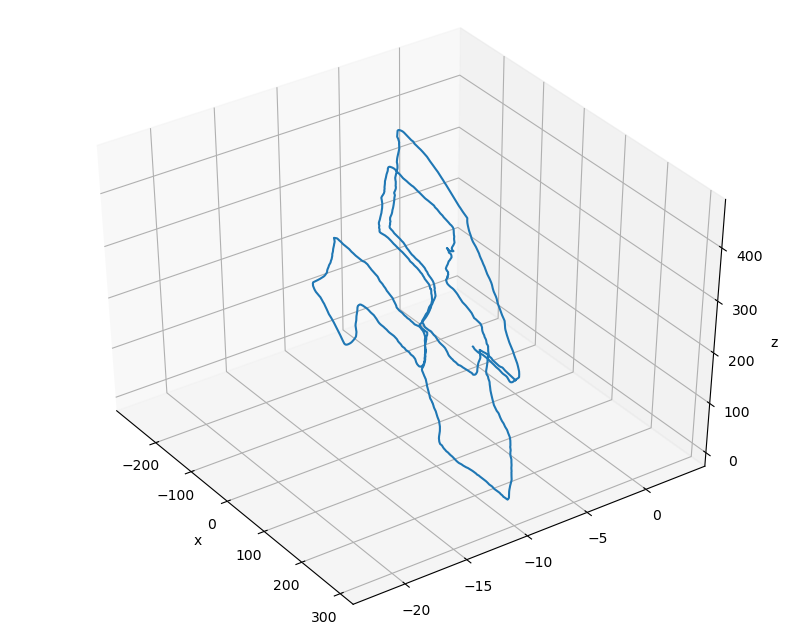

In [16]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(10,8)).add_subplot(111, projection='3d')
ax.plot(gt_poses[:,:,3][:,0], gt_poses[:,:,3][:,1], gt_poses[:,:,3][:,2])
ax.set_xlabel("x")
ax.set_zlabel("z")
ax.set_ylabel("y")
ax.view_init(elev=40., azim=-35)


(376, 1241, 3)


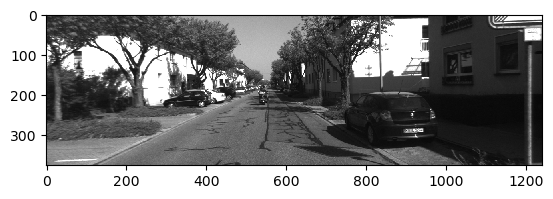

In [17]:
test_img = cv.imread('../KITTY_DATASET/sequences/00/image_0/000000.png') #image_0 is left camera and image_1 is right camera
print(test_img.shape)

%matplotlib inline 
plt.figure()
plt.imshow(test_img)

In [26]:
left_camera_imgs = os.listdir('../KITTY_DATASET/sequences/00/image_0')
times = pd.read_csv('../KITTY_DATASET/sequences/00/times.txt', header=None)
print(len(left_camera_imgs))
times.head()

4541


,0
0,0.000000
1,0.103736
2,0.207338
3,0.311075
4,0.414692


In [31]:
calib = pd.read_csv('../KITTY_DATASET/sequences/00/calib.txt', delimiter=' ',header=None, index_col=0)
calib.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
P0:,718.856,0.0,607.1928,0.00000,0.0,718.856,185.2157,0.000000,0.0,0.0,1.0,0.000000
P1:,718.856,0.0,607.1928,-386.14480,0.0,718.856,185.2157,0.000000,0.0,0.0,1.0,0.000000
P2:,718.856,0.0,607.1928,45.38225,0.0,718.856,185.2157,-0.113089,0.0,0.0,1.0,0.003780
P3:,718.856,0.0,607.1928,-337.28770,0.0,718.856,185.2157,2.369057,0.0,0.0,1.0,0.004915
